Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In this assginment, we try to build a classifier for the Fashion-MNIST dataset that achieves over 94% accuracy on the test set. 

To achieve this goal, we
- use convnet for this purpose
- learn how to use padding in convnet
- learn how to use Batch Normalization and Dropout when training deep neural networks
- learn how to use nadam optimizer
- add more layers to the exisiting network model in function build_model()
- use validation data and observe the training history to determine whether the model is good enough to run test data
- use test data set only once.

This assignment is graded on the test accuracy. Any accuracy below 93% is graded as 0; any accuracy above 94% is graded as 100. Any grade in between is graded using the fomula  (acc - 0.93)/(0.94 - 0.93), 1))*100.

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

### Labels
Each training and test example is assigned to one of the following labels:

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

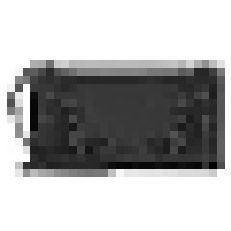

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

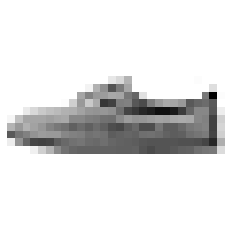

In [8]:
plot_digit(X_train[40000])

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

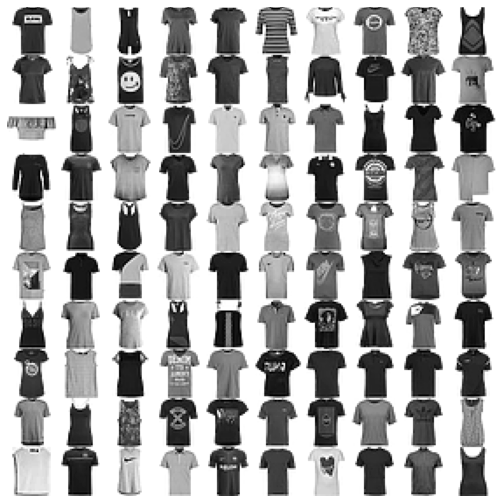

In [10]:
plt.figure(figsize=(9,9))
X_0 = X_train[(y_train == 0)]
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)

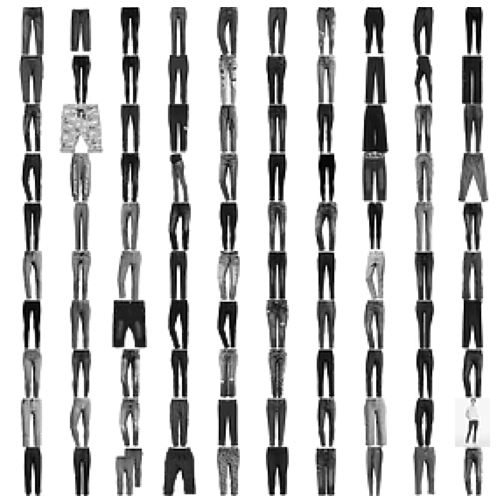

In [11]:
plt.figure(figsize=(9,9))
X_1 = X_train[(y_train == 1)]
example_images = X_1[:100]
plot_digits(example_images, images_per_row=10)

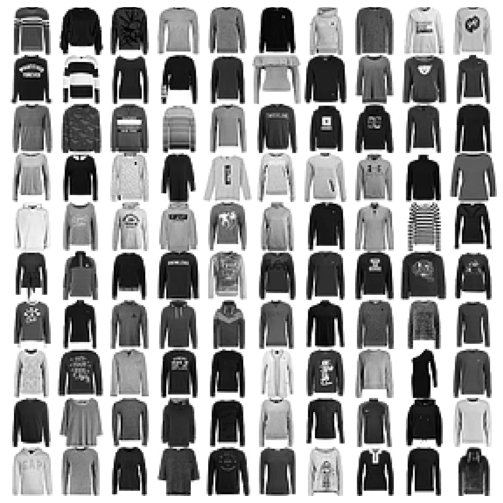

In [12]:
plt.figure(figsize=(9,9))
X_2 = X_train[(y_train == 2)]
example_images = X_2[:100]
plot_digits(example_images, images_per_row=10)

In [13]:
from keras import layers
from keras import models

def build_model():

    # we build a Y-network model with two inputs and one output

    input_shape=(28, 28, 1)
    
    # left branch
    left_inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(left_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # fill in code below to finsh the left branch



    # right branch
    right_inputs = layers.Input(shape=input_shape)
    y = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(right_inputs)
    y = layers.BatchNormalization()(y)
    y = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(y)
    y = layers.BatchNormalization()(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Dropout(0.25)(y)

    # fill in code below to finish the right branch



    # concatenate the left and the right branches
    x = layers.concatenate([x, y])
    x = layers.Flatten()(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # fill in code below


    # outputs
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model([left_inputs, right_inputs], outputs=outputs)
    return model
model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
______________________________________________________________________________________________

In [14]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
y_train = to_categorical(y_train)

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)

X_val = X_train[:10000]
y_val = y_train[:10000]

X_train_partial = X_train[10000:]
y_train_partial = y_train[10000:]

In [15]:
X_train_partial.shape, y_train_partial.shape, X_test.shape, y_test.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [16]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit([X_train_partial, X_train_partial], y_train_partial, epochs=40, batch_size=32, validation_data=([X_val, X_val], y_val))

Epoch 1/40
1563/1563 [==============================] - 32s 9ms/step - loss: 0.4799 - accuracy: 0.8386 - val_loss: 0.2949 - val_accuracy: 0.8979
Epoch 2/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2546 - accuracy: 0.9088 - val_loss: 1.0736 - val_accuracy: 0.8070
Epoch 3/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2172 - accuracy: 0.9203 - val_loss: 0.2801 - val_accuracy: 0.8994
Epoch 4/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1694 - accuracy: 0.9390 - val_loss: 0.2582 - val_accuracy: 0.9084
Epoch 5/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1485 - accuracy: 0.9457 - val_loss: 0.4481 - val_accuracy: 0.8901
Epoch 6/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1226 - accuracy: 0.9548 - val_loss: 0.2246 - val_accuracy: 0.9259
Epoch 7/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1135 - accuracy: 0.9572 - val_loss: 0.2234 - val_ac

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

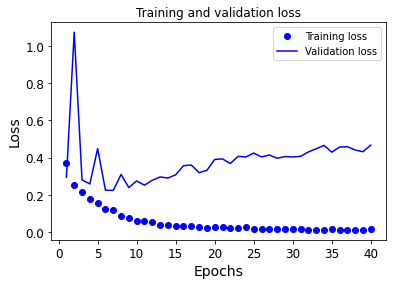

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

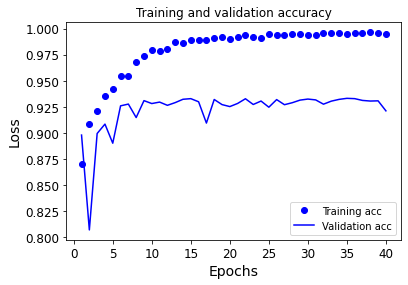

In [19]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = build_model()
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit([X_train, X_train], y_train, epochs=40, batch_size=32)

Epoch 1/40
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4718 - accuracy: 0.8432
Epoch 2/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2418 - accuracy: 0.9110
Epoch 3/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1898 - accuracy: 0.9311
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1607 - accuracy: 0.9407
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1296 - accuracy: 0.9525
Epoch 6/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1162 - accuracy: 0.9575
Epoch 7/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0848 - accuracy: 0.9693
Epoch 8/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0693 - accuracy: 0.9759
Epoch 9/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0554 - accuracy: 0.9801
Epoch 10/40
1875/1875 [==============================] - 13s 7ms/step - l

In [21]:
acc = model.evaluate([X_test, X_test], y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.9309


In [22]:
grade = max(0, min((acc[1] - 0.93)/(0.94 - 0.93), 1))*100
print('My grade:', grade)

My grade: 8.999776840209565
